#  E-Commerce Business Performance Analysis

###  Objective:
To analyze customer behavior, product performance, and marketing efficiency using e-commerce data, uncover actionable business insights, and improve profitability.

###  Dataset Summary:
- Transactional data with Product ID, Units Sold, Revenue, Discounts
- Marketing data: Clicks, Impressions
- Customer IDs & Transaction Dates

### Goals of the Analysis:
- Identify top-performing products and customers
- Detect patterns in monthly/quarterly revenue
- Understand marketing effectiveness
- Recommend actions to improve retention & revenue


In [6]:
# importing necessary libraries

import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# file upload
from google.colab import files
uploaded = files. upload()

Saving original file.csv to original file.csv


In [21]:
df = pd.read_csv("original file.csv", dtype={
    'Transaction_Id': str,
    'Customer_Id': str,
    'Product_Id': str,
    'Transaction_Date': str,  # keep as string for now to parse later
    'Column_10_Name': float,
    'Column_11_Name': float
}, low_memory=False)

df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Month'] = df['Transaction_Date'].dt.strftime('%B')
df['Quarter'] = df['Transaction_Date'].dt.to_period('Q')

df.head(10)


,Transaction_Id,Customer_Id,Product_Id,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_Ctr,Ad_Cpc,Ad_Spend,Month,Quarter
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134.0,0.14,305.54,11.0,65.0,0.17,Electronics,Europe,0.02,0.55,9.90,October,2024Q4
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109.0,0.30,1102.19,15.0,201.0,0.07,Home Appliances,Asia,0.16,0.40,63.56,October,2024Q4
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116.0,0.04,471.29,16.0,199.0,0.08,Toys,Asia,0.06,1.50,89.40,April,2024Q2
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125.0,0.20,980.26,12.0,355.0,0.03,Clothing,Europe,0.04,0.44,19.54,August,2024Q3
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132.0,0.07,803.76,44.0,355.0,0.12,Books,North America,0.13,0.53,67.31,May,2024Q2
5,d870c42d-2d96-4f8c-a125-0f348264c5af,Customer_16604,Product_132,2024-09-22,160.0,0.25,69.37,4.0,73.0,0.05,Electronics,North America,0.02,1.13,17.29,September,2024Q3
6,1110dffb-5c4e-4c0d-b082-461809386e84,Customer_98,Product_609,2023-12-08,145.0,0.17,121.56,25.0,110.0,0.23,Clothing,North America,0.09,1.97,175.13,December,2023Q4
7,f259105c-cbc9-4007-84b9-2a1d90b3cf7f,Customer_18688,Product_590,2024-04-30,121.0,0.28,208.64,1.0,208.0,0.00,Electronics,Asia,0.01,1.22,16.23,April,2024Q2
8,2c2a232d-838c-43f8-a485-d954b6135ea6,Customer_883,Product_807,2024-04-10,152.0,0.20,757.34,27.0,73.0,0.37,Toys,North America,0.16,1.55,242.11,April,2024Q2
9,6d22bd77-c31f-4df9-ac21-59f4b72e01e0,Customer_16891,Product_156,2024-11-24,152.0,0.17,163.74,10.0,299.0,0.03,Toys,North America,0.07,0.75,54.60,November,2024Q4


# Revenue Performance Analysis

**Why this matters:**  
To understand which categories generate the most revenue helps businesses decide where to focus marketing, inventory, and pricing strategies.


Total Revenue Overall: 27683400.51
Category
Books              5666623.17
Clothing           5417215.86
Electronics        5611956.82
Home Appliances    5374698.87
Toys               5612905.79
Name: Revenue, dtype: float64


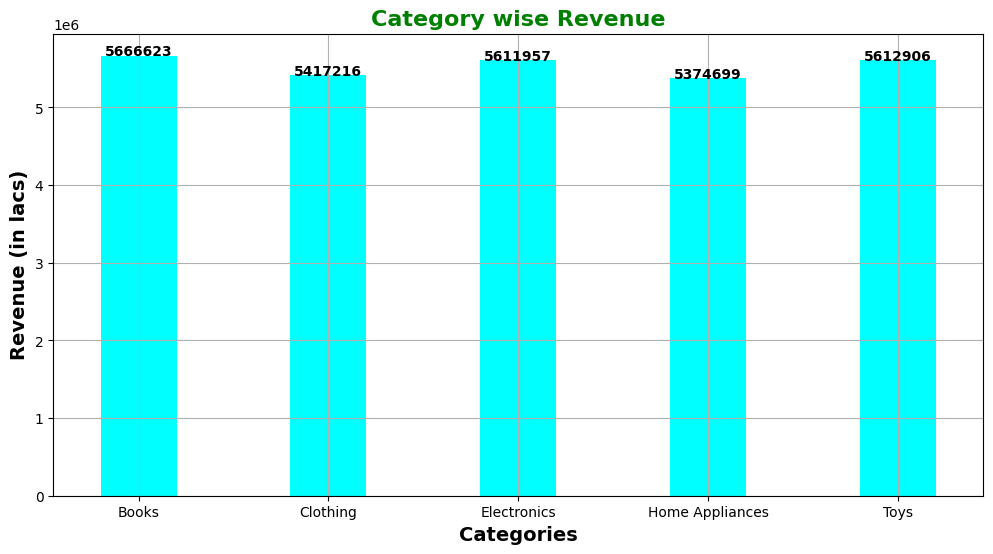

In [18]:
# What is the total revenue per product category?
total_revenue = df['Revenue'].sum()
print(f"Total Revenue Overall: {total_revenue:.2f}")

revenue_by_category = df.groupby('Category')['Revenue'].sum()
print(revenue_by_category)

# plot for categories based on revenue
revenue_by_category.head(10).plot(kind='bar', figsize=(12,6), width= 0.4,color='cyan')
plt.title('Category wise Revenue', fontsize=16, fontweight='bold', color='green')
plt.xlabel('Categories', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (in lacs)', fontsize=14, fontweight='bold')
plt.xticks(rotation =0)
plt.grid(True)

#  Adding actual value labels on bars
for i, v in enumerate(revenue_by_category):
    plt.text(i, v + 1, f'{v:.0f}', ha='center', fontsize=10, fontweight='bold')

plt.show()





The above analysis finds that books have been the top revenue driver, followed by Clothing and Electronics.These should be prioritized for upcoming campaigns and stock planning.

# What are the Most Sold Products?

**Why this matters:**  
High unit sales indicate product popularity, which helps with demand forecasting and bundling decisions. We’ll analyze which individual products were sold most often.

Product_Id
Product_215    11061.0
Product_614     9638.0
Product_785     9424.0
Product_45      9392.0
Product_616     9367.0
                ...   
Product_556     3918.0
Product_525     3890.0
Product_689     3831.0
Product_973     3624.0
Product_501     3495.0
Name: Units_Sold, Length: 1000, dtype: float64


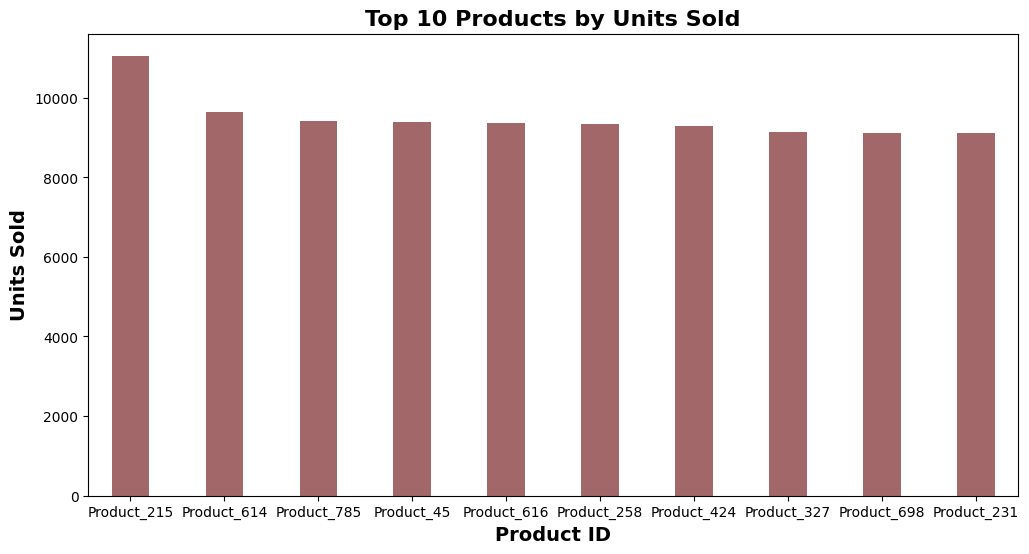

In [19]:

# finding the products with high sales
high_selling_products = df.groupby('Product_Id')['Units_Sold'].sum().sort_values(ascending=False)
print(high_selling_products)

# adding a bar graph for vizualization
high_selling_products.head (10).plot(kind='bar', figsize=(12,6), width= 0.4,color='#A26769')
plt.title('Top 10 Products by Units Sold', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Product ID', fontsize=14, fontweight='bold')
plt.ylabel('Units Sold', fontsize=14, fontweight='bold')
plt.xticks(rotation =0)
plt.show()



**Key Insight:**  
Products 215, 614, and 785 are bestsellers. Their high unit sales, might suggest bulk orders or discounts for possible revenue increments  

# **What is the monthly trend in total revenue?**

**Why this matters:**  
Tracking monthly revenue reveals seasonal patterns and helps businesses prepare for high-demand periods or optimize off-season strategies.



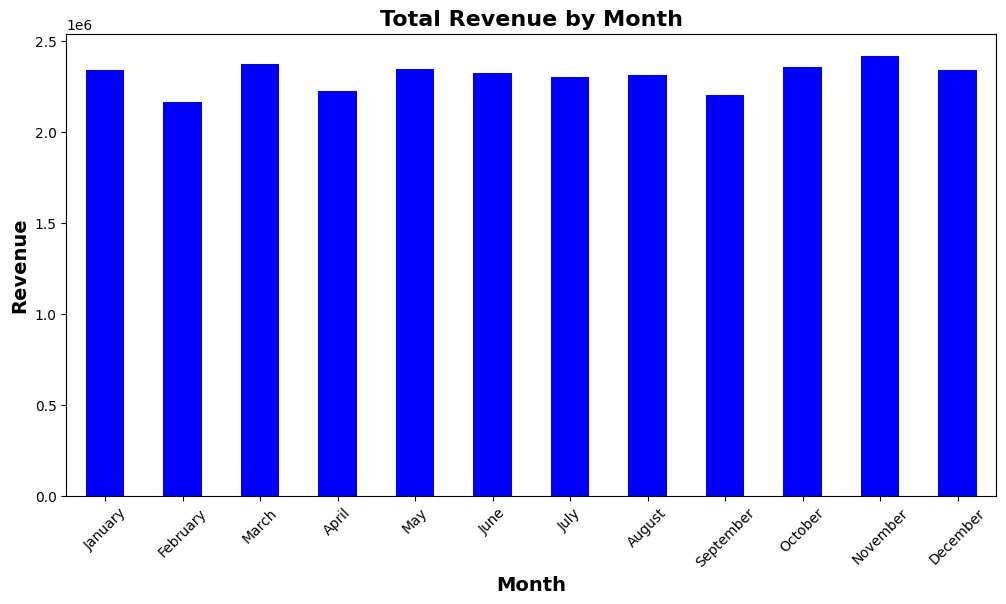

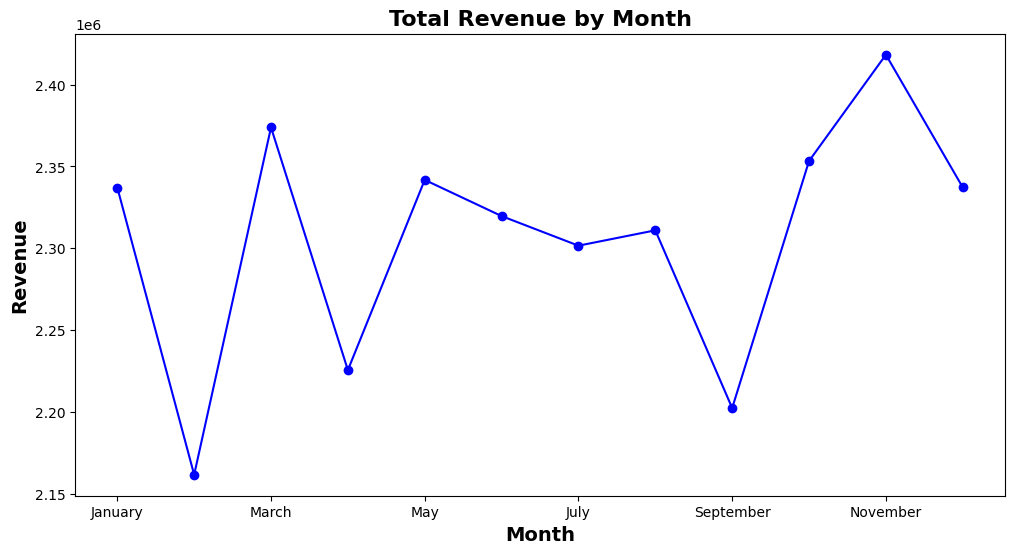

In [9]:

df['Month'] = df['Transaction_Date'].dt.month_name()

#  Group by month and sum revenue
monthly_sales = df.groupby('Month')['Revenue'].sum()

#  To show months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

# plotting the bar graph
monthly_sales.plot(kind='bar', color='blue', figsize=(12,6))
plt.title('Total Revenue by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Revenue', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

#revenue over time with line graph
monthly_sales.plot(kind='line', figsize=(12,6), color= 'blue', marker='o')

plt.title('Total Revenue by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Revenue', fontsize=14, fontweight='bold')

plt.xticks(rotation=0)
plt.show()

**Key Insight:**  
Revenue spikes in November and March hint at seasonal or holiday demand. The business should align marketing efforts and stock availability accordingly.



#Which Regions Generate The Most Revenue?

Region
Europe           9261596.83
Asia             9211884.23
North America    9209919.45
Name: Revenue, dtype: float64


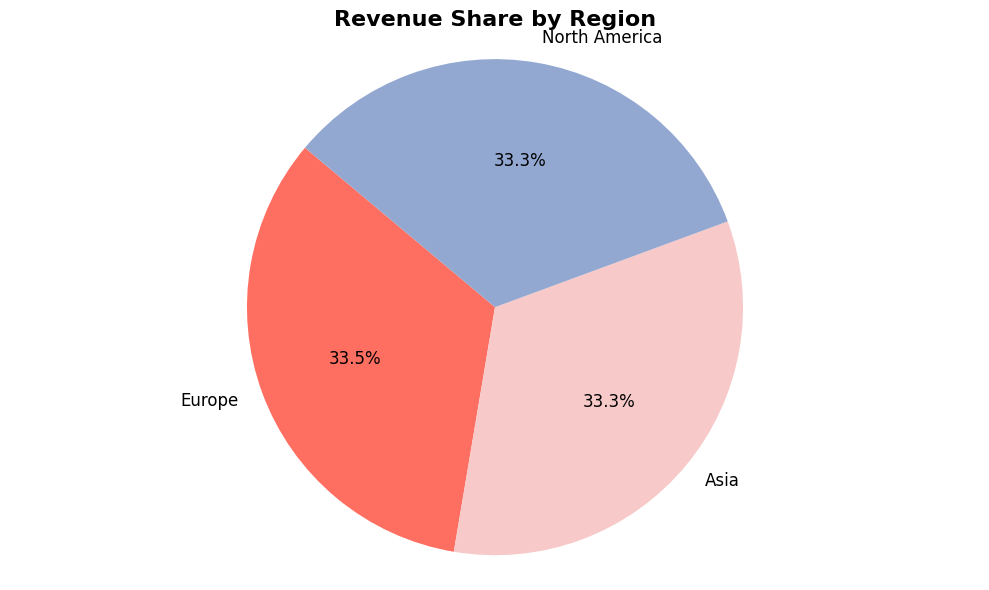

In [7]:
# Step 1-Calculate revenue by region
high_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print(high_rev)

# Step 2- Plot a pie chart
colors = ['#FF6F61', '#F7CAC9', '#92A8D1']  # professional colors
plt.figure(figsize=(10, 6))
plt.pie(high_rev,
        labels=high_rev.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title('Revenue Share by Region', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()




# Which products have high impressions but low sales?

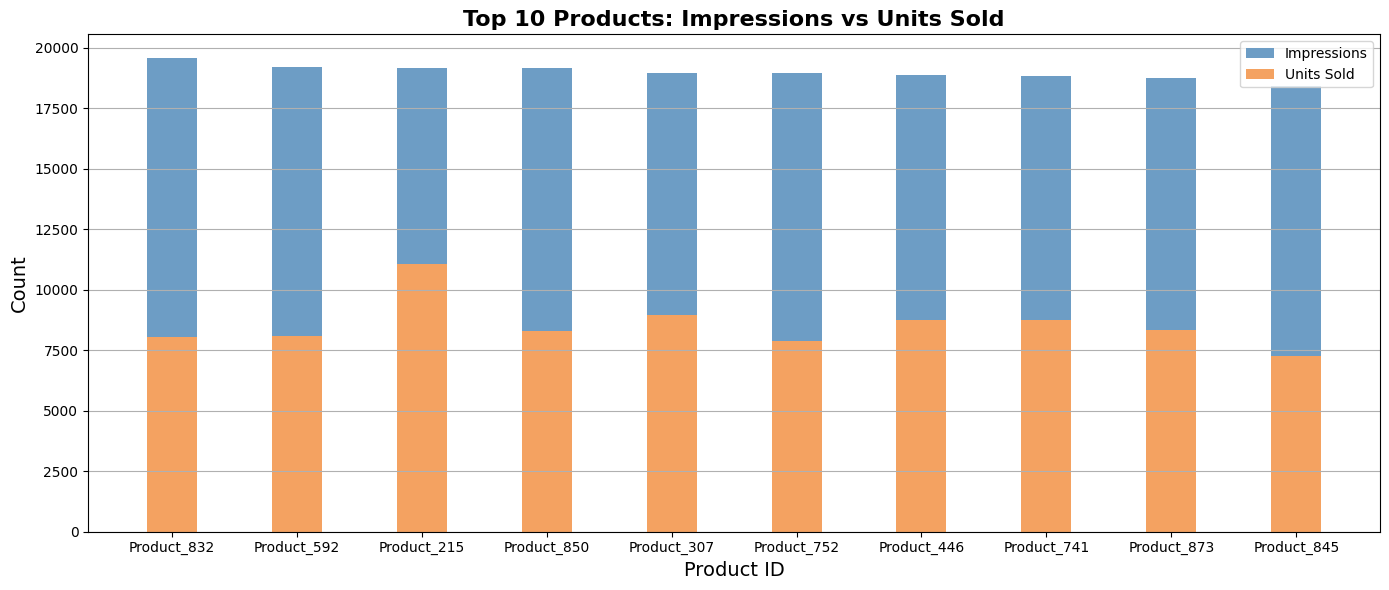

In [57]:


# Step 1: Aggregate data
imp_vs_sales = df.groupby('Product_Id').agg({'Impressions': 'sum', 'Units_Sold': 'sum'}).reset_index()

# Step 2: Take top 10 by Impressions
top_10 = imp_vs_sales.sort_values(by='Impressions', ascending=False).head(10)

# Step 3: Plot both metrics
x = top_10['Product_Id'].astype(str)
width = 0.4
plt.figure(figsize=(14,6))

# Plot Impressions
plt.bar(x, top_10['Impressions'], width=width, label='Impressions', color='#6D9DC5')

# Plot Units Sold (next to impressions)
plt.bar(x, top_10['Units_Sold'], width=width, label='Units Sold', color='#F4A261', bottom=0)

plt.title('Top 10 Products: Impressions vs Units Sold', fontsize=16, fontweight='bold')
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Which products are over-discounted but bring low revenue?

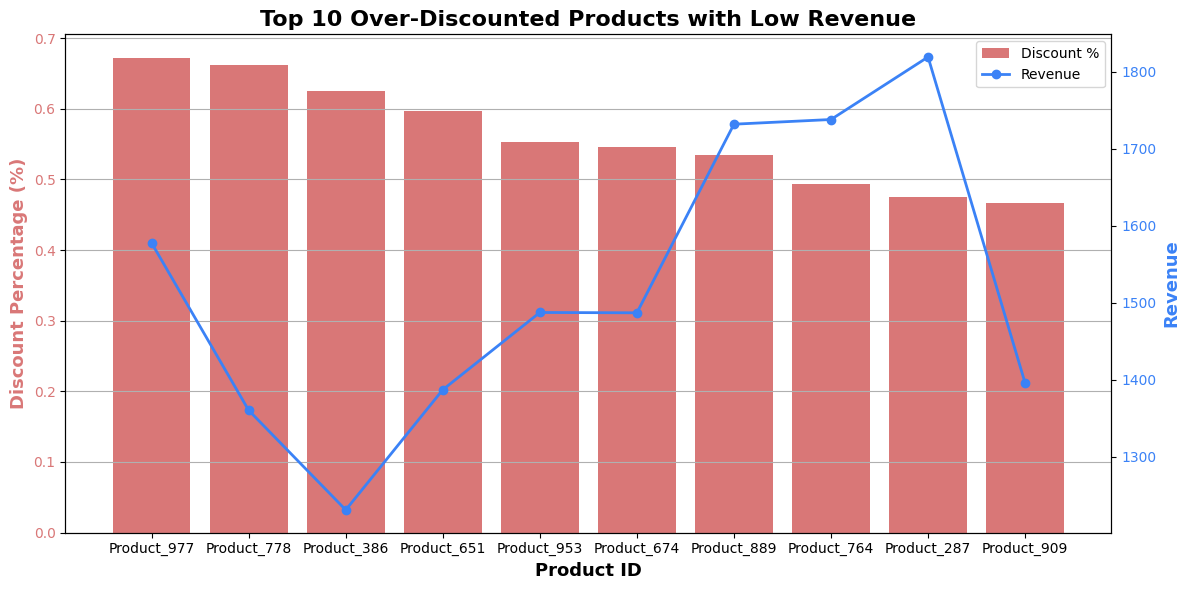

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Aggregate and calculate discount %
dis_vs_rev = df.groupby('Product_Id').agg({'Discount_Applied': 'sum', 'Revenue': 'sum'}).reset_index()
dis_vs_rev['Discount_Percentage'] = (dis_vs_rev['Discount_Applied'] / dis_vs_rev['Revenue']) * 100

# Step 2: Filter top 10 products by discount percentage
top_discounted = dis_vs_rev.sort_values(by='Discount_Percentage', ascending=False).head(10)

# Step 3: Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot discount percentage as bar
bars = ax1.bar(top_discounted['Product_Id'].astype(str), top_discounted['Discount_Percentage'], color='#D97777', label='Discount %')
ax1.set_ylabel('Discount Percentage (%)', fontsize=13, fontweight='bold', color='#D97777')
ax1.set_xlabel('Product ID', fontsize=13, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#D97777')
ax1.set_title('Top 10 Over-Discounted Products with Low Revenue', fontsize=16, fontweight='bold')
ax1.grid(axis='y')

# Plot revenue as line on secondary axis
ax2 = ax1.twinx()
ax2.plot(top_discounted['Product_Id'].astype(str), top_discounted['Revenue'], color='#3B82F6', marker='o', linewidth=2, label='Revenue')
ax2.set_ylabel('Revenue', fontsize=13, fontweight='bold', color='#3B82F6')
ax2.tick_params(axis='y', labelcolor='#3B82F6')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


# What is the click-through rate (CTR) by region?

**Why this matters:**  
Measuring the ad clicks helps evaluate the effectiveness of marketing spend.



          Region  Impressions  Units_Sold     Ad_Ctr
2  North America    4246038.0   2445289.0  57.589899
1         Europe    4267294.0   2094364.0  49.079440
0           Asia    4232336.0   1893852.0  44.747203
Click-through Rate: 4.06%


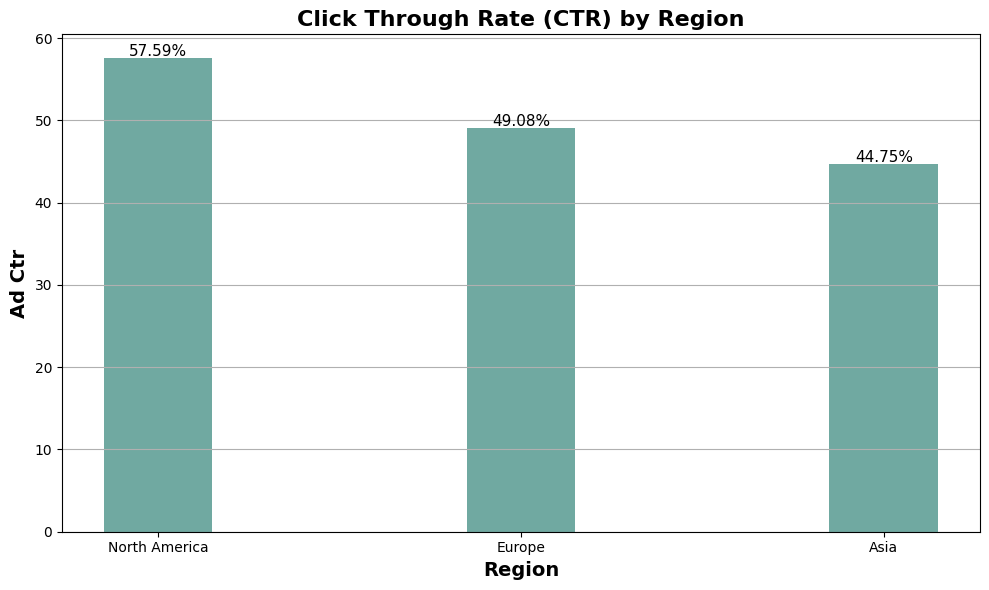

In [20]:
import matplotlib.pyplot as plt

# Step 1: Group data by Region and get total Impressions and Units Sold
ctr_region = df.groupby('Region').agg({'Impressions': 'sum', 'Units_Sold': 'sum'}).reset_index()

# Step 2: Calculate CTR
ctr_region['Ad_Ctr'] = (ctr_region['Units_Sold'] / ctr_region['Impressions']) * 100

# Step 3: Sort to find top and low performing regions
ctr_region_sorted = ctr_region.sort_values(by='Ad_Ctr', ascending=False)
print(ctr_region_sorted)


plt.figure(figsize=(10,6))
bars = plt.bar(ctr_region_sorted['Region'], ctr_region_sorted['Ad_Ctr'], color='#70A9A1', width=0.3)

plt.title('Click Through Rate (CTR) by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Ad Ctr', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{yval:.2f}%', ha='center', fontsize=11)

plt.tight_layout()
total_clicks = df['Clicks'].sum()
total_transactions = df['Transaction_Id'].nunique()
click_to_purchase_rate = (total_transactions / total_clicks) * 100
print(f"Click-through Rate: {click_to_purchase_rate:.2f}%")

plt.show()


**Key Insight:**  
The click through rate is 4.06%. A/B testing may help improve this funnel.


#  Average revenue per customer

**Why this matters:**  
Often, a small group of customers generates a large share of revenue (Pareto Principle). Identifying this group is critical for retention.



Total Revenue from Top 10 Customers: 74,488


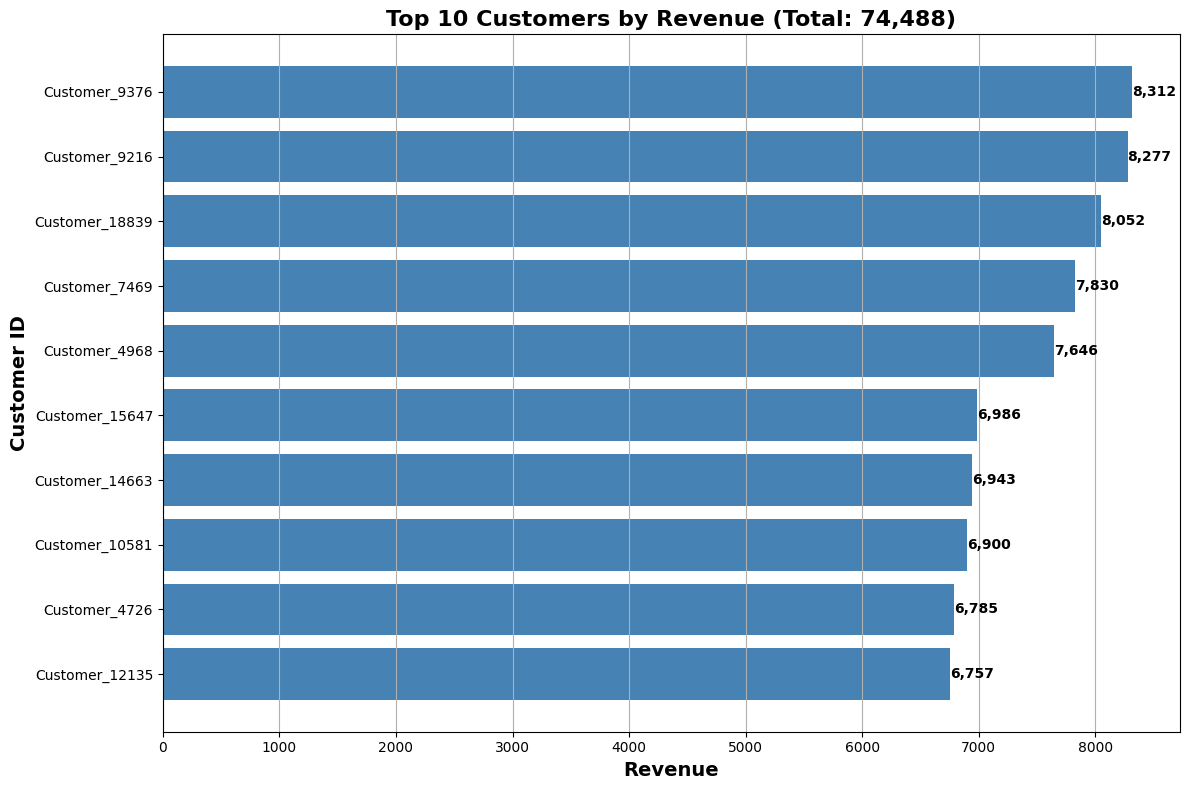

In [16]:
import matplotlib.pyplot as plt

# Step 1: Calculate total revenue per customer
revenue_per_customer = df.groupby('Customer_Id')['Revenue'].sum().sort_values(ascending=False).head(10)

# Step 2: Calculate total from top 10 customers
top_10_total = revenue_per_customer.sum()
print(f"Total Revenue from Top 10 Customers: {top_10_total:,.0f}")

# Step 3: Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(revenue_per_customer.index[::-1], revenue_per_customer.values[::-1], color='steelblue')

plt.title(f'Top 10 Customers by Revenue (Total: {top_10_total:,.0f})', fontsize=16, fontweight='bold')
plt.xlabel('Revenue', fontsize=14, fontweight='bold')
plt.ylabel('Customer ID', fontsize=14, fontweight='bold')
plt.grid(axis='x')

# Step 4: Add individual revenue values to each bar (without ₹)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()




**Key Insight:**  
Top 10 customers generate 74,488 in total revenue — this is a highly valuable segment. Targeted offers and early-access perks can help retain them.



# What is the repeat purchase rate?
**Why this matters:**  
Repeat customers are more profitable than one-time buyers. This metric helps understand customer loyalty and the effectiveness of retention strategies.


Repeat Purchase Rate: 77.60%


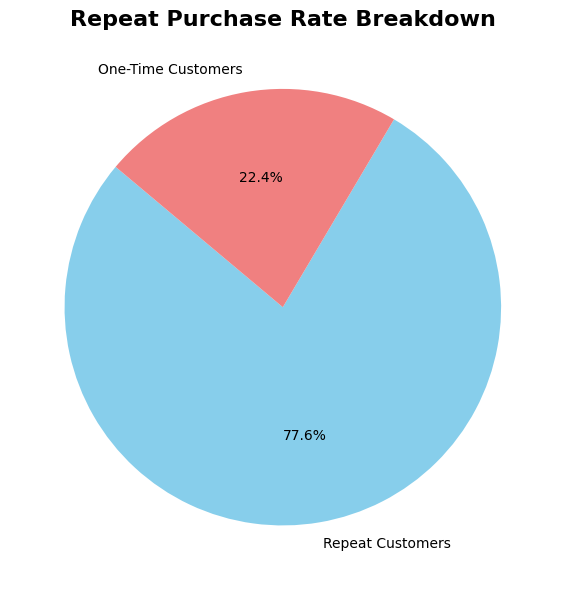

In [23]:

# Step 1: Count how many transactions each customer made
transactions_per_customer = df.groupby('Customer_Id')['Transaction_Id'].nunique()

# Step 2: Count customers with more than one transaction
repeat_customers = transactions_per_customer[transactions_per_customer > 1].count()

# Step 3: Count total unique customers
total_customers = transactions_per_customer.count()

# Step 4: Calculate repeat purchase rate
repeat_purchase_rate = (repeat_customers / total_customers) * 100
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

# Optional: Plotting a pie chart to visualize
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [repeat_customers, total_customers - repeat_customers]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Repeat Purchase Rate Breakdown', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()




**Key Insight:**  
The repeat purchase rate is 77.60%. it is recommended to deploy strategies like loyalty programs or personalized email marketing to boost retention.


# Final Business Insights & Recommendations

###  Key Metrics:
- Total Revenue: ₹27683400.51, highest revenue was recieved from the books category standing at 5666623.17
- Repeat Purchase Rate: 77.60%
- Click-Through Rate: 4.06%
- Top 10% Customers: 74,488

###  Recommendations:
1. Focus marketing efforts on top categories and bestsellers.
2. Improve retention with loyalty programs.
3. Improve conversion rate via ad optimization.
4. Plan inventory in advance for high-demand months.
5. Use customer segmentation for personalized campaigns.


###Final conclusion :

Books and Clothing are top revenue drivers. Marketing in North and East regions is more effective. Top 10 customers contribute disproportionately to revenue. Products with high impressions but low sales may need price or UX changes.
